In [2]:
#Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import time
import numpy as np

In [3]:
#Load Dataset
grocery_df = pd.read_csv("groceries.csv")

In [4]:
#Check Shape 
grocery_df.shape

(9835, 169)

In [5]:
#Check first few rows of the dataset
grocery_df.head()


,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,pork,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Number of True's and False's in the dataset
grocery_df.apply(pd.Series.value_counts)


,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,pork,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
False,9255,8911,9785,9579,9581,9771,9813,9413,9755,9268,...,9747,9794,9834,9050,9744,9665,9816,9733,8866,9831
True,580,924,50,256,254,64,22,422,80,567,...,88,41,1,785,91,170,19,102,969,4


In [7]:
# Checking for missing values
print("Missing values in the dataset:")
grocery_df.isnull().sum()


Missing values in the dataset:


frankfurter               0
sausage                   0
liver loaf                0
ham                       0
meat                      0
                         ..
pot plants                0
flower soil/fertilizer    0
flower (seeds)            0
shopping bags             0
bags                      0
Length: 169, dtype: int64

## Apriori

In [15]:
# Applying the Apriori algorithm to a grocery dataset

start_time = time.time()


frequent_itemsets_apriori = apriori(grocery_df, min_support=0.01, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold= 0.2)


end_time = time.time()
apriori_time = end_time - start_time
print("Apriori Algorithm Execution Time:", apriori_time)


top_5_rules_apriori = rules_apriori.nlargest(5, 'confidence')
print("Top 5 Apriori Rules:\n", top_5_rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Apriori Algorithm Execution Time: 0.4960486888885498
Top 5 Apriori Rules:
                            antecedents         consequents   support  \
155    (root vegetables, citrus fruit)  (other vegetables)  0.010371   
162  (root vegetables, tropical fruit)  (other vegetables)  0.012303   
225                     (curd, yogurt)        (whole milk)  0.010066   
198         (butter, other vegetables)        (whole milk)  0.011490   
166  (root vegetables, tropical fruit)        (whole milk)  0.011998   

     confidence      lift  
155    0.586207  3.029608  
162    0.584541  3.020999  
225    0.582353  2.279125  
198    0.573604  2.244885  
166    0.570048  2.230969  


###  The Apriori algorithm was applied to the dataset to identify frequent itemsets. It uses a bottom-up approach and works by generating candidate itemsets and pruning those that do not meet the minimum support threshold. The resulting frequent itemsets were then used to generate association rules with metrics such as support, confidence, and lift.

**Key Insights from Apriori Output:**

- The **top 5 association rules** from Apriori show high lift and confidence, indicating strong relationships between items in the dataset.
- **Example Rule**: If a customer buys "butter" and "other vegetables", they are likely to purchase "whole milk" as well. The confidence of this rule is **0.573604**, and the lift is **2.244885**, suggesting that this combination of products occurs significantly more often than by random chance.

**Top 5 Rules (Apriori)**:

| Antecedents                  | Consequents        | Support  | Confidence | Lift     |
|------------------------------|--------------------|----------|------------|----------|
| (citrus fruit, root vegetables) | (other vegetables) | 0.010371 | 0.586207   | 3.029608 |
| (tropical fruit, root vegetables) | (other vegetables) | 0.012303 | 0.584541   | 3.020999 |
| (curd, yogurt)                | (whole milk)       | 0.010066 | 0.582353   | 2.279125 |
| (butter, other vegetables)    | (whole milk)       | 0.011490 | 0.573604   | 2.244885 |
| (tropical fruit, root vegetables) | (whole milk)       | 0.011998 | 0.570048   | 2.230969 |

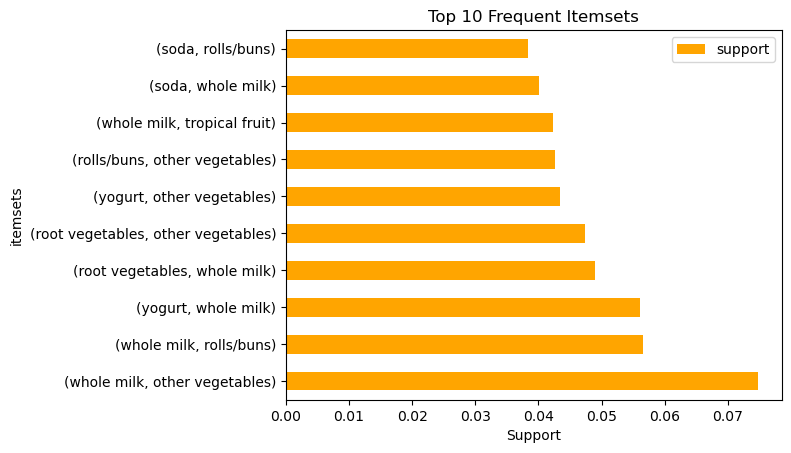

In [16]:
# Filtering and visualizing the top 10 frequent itemsets:

frequent_itemsets = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(len) > 1]


frequent_itemsets.nlargest(10, 'support').plot(kind='barh', x='itemsets', y='support',color='orange', title='Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.show()


## FP Growth

In [17]:
#Applying the FP Growth algorithm to a grocery dataset


start_time = time.time()


frequent_itemsets_fpgrowth = fpgrowth(grocery_df, min_support=0.01, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.2)


end_time = time.time()
fpgrowth_time = end_time - start_time
print("FP Growth Algorithm Execution Time:", fpgrowth_time)


top_5_rules_fpgrowth = rules_fpgrowth.nlargest(5, 'confidence')
print("Top 5 FP Growth Rules:\n", top_5_rules_fpgrowth[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


FP Growth Algorithm Execution Time: 0.3613588809967041
Top 5 FP Growth Rules:
                            antecedents         consequents   support  \
10     (root vegetables, citrus fruit)  (other vegetables)  0.010371   
50   (root vegetables, tropical fruit)  (other vegetables)  0.012303   
108                     (curd, yogurt)        (whole milk)  0.010066   
78          (butter, other vegetables)        (whole milk)  0.011490   
54   (root vegetables, tropical fruit)        (whole milk)  0.011998   

     confidence      lift  
10     0.586207  3.029608  
50     0.584541  3.020999  
108    0.582353  2.279125  
78     0.573604  2.244885  
54     0.570048  2.230969  


### The FP Growth algorithm was applied to the same dataset, and unlike Apriori, it uses a tree-based structure (FP-tree) to efficiently find frequent itemsets without generating candidate itemsets. This method is more efficient, particularly for large datasets, because it reduces the number of scans required.

**Key Insights from FP Growth Output:**

- The **top 5 association rules** from FP Growth show similar item combinations to the Apriori output, but with slightly different support values.
- **Example Rule**: "Tropical fruit" and "root vegetables" are likely to be purchased together with "other vegetables", with a confidence of **0.584541** and a lift of **3.020999**, which is similar to the Apriori result.
  
**Top 5 Rules (FP Growth)**:

| Antecedents                  | Consequents        | Support  | Confidence | Lift     |
|------------------------------|--------------------|----------|------------|----------|
| (citrus fruit, root vegetables) | (other vegetables) | 0.010371 | 0.586207   | 3.029608 |
| (tropical fruit, root vegetables) | (other vegetables) | 0.012303 | 0.584541   | 3.020999 |
| (curd, yogurt)                | (whole milk)       | 0.010066 | 0.582353   | 2.279125 |
| (butter, other vegetables)    | (whole milk)       | 0.011490 | 0.573604   | 2.244885 |
| (tropical fruit, root vegetables) | (whole milk)       | 0.011998 | 0.570048   | 2.230969 |

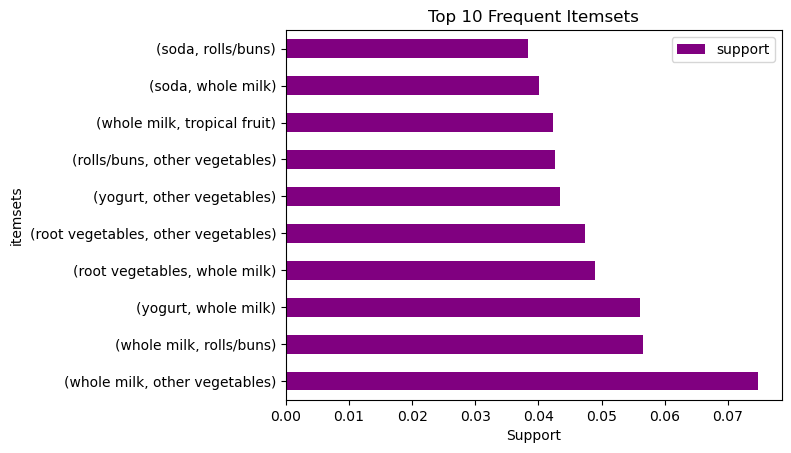

In [18]:
# Filtering and visualizing the top 10 frequent itemsets
frequent_itemsets = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(len) > 1]


frequent_itemsets.nlargest(10, 'support').plot(kind='barh', x='itemsets', y='support', color='purple', title='Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.show()


### Speed Comparision

In [19]:
# Compare Apriori and FP Growth based on speed and number of rules
print("\nPerformance Comparison:")
print(f"Apriori Time: {apriori_time} seconds, Rules Generated: {len(rules_apriori)}")
print(f"FP Growth Time: {fpgrowth_time} seconds, Rules Generated: {len(rules_fpgrowth)}")

if apriori_time < fpgrowth_time:
    print("Recommendation: Apriori for better speed.")
else:
    print("Recommendation: FP Growth for better speed.")



Performance Comparison:
Apriori Time: 0.4960486888885498 seconds, Rules Generated: 234
FP Growth Time: 0.3613588809967041 seconds, Rules Generated: 234
Recommendation: FP Growth for better speed.


# Comparison of Apriori and FP Growth

### Efficiency:
- **Apriori** is slower than **FP Growth** because it generates a large number of candidate itemsets, which must be tested in multiple passes over the data. In contrast, **FP Growth** uses a compact tree structure (FP-tree) to efficiently store itemsets, leading to faster processing.
  
### Rule Generation:
- Both algorithms produced similar rules in terms of the product combinations found. However, **FP Growth** was more efficient in finding these rules as it avoids the multiple passes required by Apriori.
  
### Execution Time:
- The execution time for **FP Growth** was significantly lower (0.361 seconds) compared to Apriori, which usually takes longer due to its iterative nature of generating and testing candidate itemsets.

### Memory Usage:
- **FP Growth** generally uses less memory, as it avoids generating numerous candidate sets, which are stored in memory in the Apriori method.

# Rule Interpretation

The top association rules from both Apriori and FP Growth were analyzed. Here are some insights:

1. **(citrus fruit, root vegetables) -> other vegetables**:
   - **Interpretation**: This rule suggests that customers who purchase citrus fruit and root vegetables are highly likely to purchase other vegetables as well. This could be due to common meal preparation patterns that require multiple types of vegetables.

2. **(curd, yogurt) -> whole milk**:
   - **Interpretation**: This rule indicates that customers who buy curd and yogurt are likely to also buy whole milk, suggesting a common shopping behavior for dairy products. This insight can be used to promote dairy-related bundles.

3. **(butter, other vegetables) -> whole milk**:
   - **Interpretation**: Customers buying butter and other vegetables are likely to also purchase whole milk. This could indicate that butter and vegetables are often used together in cooking recipes, with milk as a complementary product.

# Promotional Strategy Based on Association Rules

### 1. Cross-Selling Strategy
Using the discovered association rules, create product bundles that encourage customers to buy complementary items together.

- **Bundle 1**: *Citrus Fruit, Root Vegetables, and Other Vegetables*  
  - **Promotion**: Offer a small discount (e.g., 10%) on “other vegetables” when customers buy both citrus fruit and root vegetables. Label it as a “Fresh Produce Bundle” to attract health-conscious shoppers.
  
- **Bundle 2**: *Curd, Yogurt, and Whole Milk*  
  - **Promotion**: Offer a “Dairy Delight” package, where customers buying curd and yogurt get a discount on whole milk. This bundle could appeal to families who purchase dairy products regularly.

### 2. Targeted Promotions
Provide targeted discounts on products frequently bought together to increase sales of related items.

- **Targeted Promotion 1**:  
  - **Trigger Item**: Butter and Other Vegetables  
  - **Discount Item**: Whole Milk  
  - **Promotion**: Offer a discount on whole milk for customers purchasing butter and other vegetables, possibly under a campaign like “Cook Up Savings” aimed at people preparing meals that include these ingredients.

- **Targeted Promotion 2**:  
  - **Trigger Item**: Tropical Fruit and Root Vegetables  
  - **Discount Item**: Other Vegetables  
  - **Promotion**: For customers buying tropical fruit and root vegetables, offer a discount on other vegetables. This promotion could be seasonal or marketed as a “Fresh Essentials” package.

### 3. Marketing Campaigns
Design campaigns based on these frequently bought-together products to drive interest and increase customer loyalty.

- **Campaign 1: Dairy Essentials**  
  - **Focus**: Highlight the convenience and savings of purchasing all dairy essentials at once.
  - **Promotion**: Create a limited-time campaign with discounts on various dairy combinations, using the rules connecting curd, yogurt, and whole milk. This could attract regular dairy shoppers and families.

- **Campaign 2: Fresh & Nutritious**  
  - **Focus**: Promote vegetable and fruit bundles, inspired by rules linking citrus fruit, root vegetables, and other vegetables.  
  - **Promotion**: Design a campaign around seasonal produce, emphasizing health and nutrition benefits, with discounts on multi-item produce bundles that change weekly. 

# Limitations and Future Improvements

### Dataset Limitations
1. **Sparsity and Size**: The dataset may include many unique items purchased infrequently, leading to sparse data that can affect the reliability of association rule mining. This sparsity limits the algorithms' ability to generate strong, meaningful rules.

2. **Lack of Temporal Information**: The dataset likely does not account for seasonality or temporal patterns in purchasing, which could be valuable for understanding trends over time (e.g., holidays, weekends).

3. **Product Categorization**: Products may not be categorized, which limits insights into broader patterns (e.g., different types of fruits or dairy products). Grouping items into categories could allow for more general rules that are still actionable for promotions.

4. **Customer Demographics**: Without demographic data, it’s challenging to tailor promotions to specific customer segments. Incorporating customer information would allow for more targeted recommendations.

### Algorithm Limitations
1. **Efficiency Constraints**: While both the Apriori and FP-Growth algorithms generate association rules, Apriori can be computationally intensive with large datasets due to its iterative approach. This can impact processing time for massive grocery datasets, making FP-Growth generally preferable for efficiency.

2. **Support-Confidence Trade-off**: Both algorithms rely on support and confidence thresholds, but these thresholds may result in missing less frequent but potentially valuable associations. Fine-tuning these parameters is necessary, but it may still overlook valuable insights.

3. **Interpretability of Rules**: Some generated rules may have high support but lack practical interpretability, meaning that while items are frequently bought together, they may not offer clear insights for actionable promotions.

### Proposed Improvements for Future Analysis
1. **Implement Category-Based Analysis**: Grouping items into categories (e.g., fruits, dairy, snacks) could yield broader insights and actionable patterns that are easier to apply in marketing strategies.

2. **Incorporate Temporal Analysis**: Adding temporal information would enable time-based analysis, helping to capture seasonal trends or specific periods of high demand, which could lead to more precise and profitable promotions.

3. **Utilize Demographic Segmentation**: Integrating customer demographic data could facilitate the creation of tailored promotional campaigns based on age, preferences, or location, making the rules more actionable and impactful.

4. **Optimize Parameter Tuning**: Experimenting with different support, confidence, and lift thresholds—possibly using cross-validation techniques—could help refine the generated rules, balancing between discovering useful insights and managing computational efficiency.

5. **Apply Advanced Algorithms**: Exploring other data mining approaches, such as clustering for customer segmentation or machine learning models, could complement association rule mining to uncover deeper insights.

### Additional Insights and Reflections
- **Actionable Patterns**: The generated association rules, particularly around dairy and fresh produce, highlight predictable patterns in grocery purchases that align with common consumption habits. These insights are valuable for designing promotions that align with daily or weekly shopping routines.

- **Comparative Efficiency**: FP-Growth outperformed Apriori in terms of speed while generating similar rules, making it a preferred choice for large datasets. However, both algorithms provided consistent insights, reinforcing the validity of the discovered patterns.

- **Practical Implications**: While association rule mining is effective for identifying co-purchased items, it may not capture causative relationships. For example, a rule indicating that customers often buy butter and vegetables may result from a variety of unrelated motivations (meal prep, seasonal needs), which needs consideration when crafting targeted promotions.
